# Classification with a single-layer perceptron

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Data

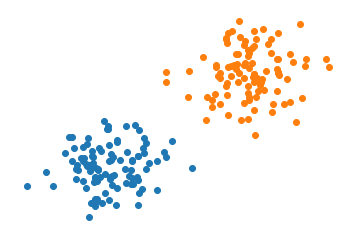

In [85]:
np.random.seed(3)
# Generate two classes 
class1 = np.random.multivariate_normal([-1, -1], [[.2, 0],[0, .2]], 100)
class2 = np.random.multivariate_normal([1, 1], [[.2, 0],[0, .2]], 100)

# Make a scatter plot of the classes
plt.scatter(class1[:,0],class1[:,1])
plt.scatter(class2[:,0],class2[:,1])
plt.xticks([])
plt.yticks([])
plt.axis("off")


# Create targets for each of the classes
class1Targets = np.ones((len(class1),1))*-1
class2Targets = np.ones((len(class2),1))

# Concatenate the classes to the data, create data
class1 = np.concatenate((class1, class1Targets), axis=1)
class2 = np.concatenate((class2, class2Targets), axis=1)
data = np.concatenate((class1, class2), axis=0)
np.random.shuffle(data)



## Classifcation with single-layer perceptron

In [86]:
# InputDim includes bias (2+1)
def generate_weights(inputDim, outputDim):
    np.random.seed(6)
    W = np.random.rand(outputDim, inputDim)/10
    return W
# Get the inputs from the data. Dimensions of returned matrix is (dim X N)
def get_inputs(data):
    X = data[:,:2]
    X = np.concatenate((X,np.ones((len(X),1))),axis=1)
    return X.T
# Get outputs from the data
def get_outputs(data):
    T = data[:,2]
    return T.T



### Perceptron Learning

In [87]:
# Threshold Function
def classify(inputs, weights):
    Y = weights.dot(inputs)
    Y = np.where(Y < 0, -1, 1)
    return Y
# Perceptron sequential training
def train(data, epochs, rate):
    W = generate_weights(3,1)
    
    # Create empty array for errors so we can see training progress
    errors = []
    for j in range(epochs):
        # Shuffle the data after we've gone through all samples
        np.random.shuffle(data)
        X = get_inputs(data)
        T = get_outputs(data)
        for i in range(len(data)):
            # Extract a single pattern/output pair 
            target = T[i].reshape(-1,1)
            pattern = X[:,i].reshape(-1,1)
            
            output = classify(X, W)
            err = np.sum(np.abs(output - T)/2)
            errRate = err/len(data)
            errors.append(errRate*100)
            
            
            # Perceptron learning rule
            update = rate*(target-classify(pattern,W)).dot(pattern.T)
            W += update
            
            # Check output with new weights and compare to targets
            #if i % 20 == 0:
            #    print("Sample", i, errRate*100,"%")
            #if err == 0:
            #    print("Sample", i, errRate*100,"%")
            #    break
        #print("Epoch", j, errRate*100,"%")
        if err == 0:
            break
    return W.reshape(-1,), errors


# Perceptron batch learning
def trainBatch(data, epochs, rate):
    W = generate_weights(3,1)
    
    # Create empty array for errors to see training progress
    errors = []
    
    for j in range(epochs):
        # Randomly shuffle the data and extract inputs and outputs from data
        np.random.shuffle(data)
        X = get_inputs(data)
        T = get_outputs(data).reshape(1,-1)
        output = classify(X,W)
        err = np.sum(np.abs(output - T)/2)
        errRate = err/len(data)
        errors.append(errRate*100)
        
        
        # Perceptron learning rule
        update = rate*(T-classify(X,W)).dot(X.T)
        W += update
        
        # Use new weights to generate outputs and compare to targets
        if err == 0:
            break
    return W.reshape(-1,), errors
            
# Get learned weights and errors from sequential and batch learning          
propSeqW, propSeqE = train(data,10,0.001)
propBatchW, propBatchE = trainBatch(data,10,0.001)






### Delta Rule

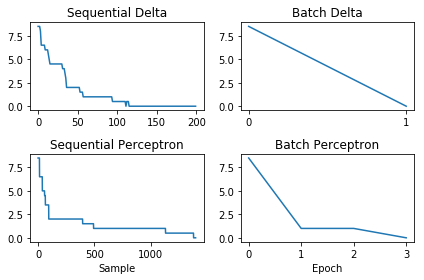

In [89]:
# Batch updata using the delta rule
def deltaBatch(data, epochs, rate):
    W = generate_weights(3,1)
    errors = []
    for j in range(epochs):
        np.random.shuffle(data)
        X = get_inputs(data)
        T = get_outputs(data).reshape(1,-1)
        
        output = classify(X,W)
        
        err = np.sum(np.abs(output - T)/2)
        errRate = err/len(data)
        errors.append(errRate*100)
        
        update = rate*(T-W.dot(X)).dot(X.T)
        W += update
        
        #print("Epoch", j, errRate*100,"%")
        if err == 0:
            break
    return W.reshape(-1,), errors

# Sequential update using delta rule
def deltaSeq(data, epochs, rate):
    W = generate_weights(3,1)
    errors = []
    for j in range(epochs):
        np.random.shuffle(data)
        X = get_inputs(data)
        T = get_outputs(data)
        for i in range(len(data)):
            target = T[i].reshape(-1,1)
            pattern = X[:,i].reshape(-1,1)
            
            output = classify(X, W)
            err = np.sum(np.abs(output - T)/2)
            errRate = err/len(data)
            errors.append(errRate*100)
            
            update = rate*(target-W.dot(pattern)).dot(pattern.T)
            W += update
            
            #if i % 20 == 0:
            #    print("Sample", i, errRate*100,"%")
            #if err == 0:
            #    print("Sample", i, errRate*100,"%")
            #    break
        #print("Epoch", j, errRate*100,"%")
        if err == 0:
            break
    return W.reshape(-1,), errors

# Get learned weights and errors 
deltaSeqW, deltaSeqE = deltaSeq(data, 10, 0.001)
deltaBatchW, deltaBatchE = deltaBatch(data, 10, 0.001)


plt.subplot(2,2,1)
plt.plot(deltaSeqE)
plt.title("Sequential Delta")

plt.subplot(2,2,2)
plt.plot(deltaBatchE)
plt.xticks([0,1])
plt.title("Batch Delta")


plt.subplot(2,2,3)
plt.plot(propSeqE)

plt.xlabel("Sample")
plt.title("Sequential Perceptron")

plt.subplot(2,2,4)
plt.plot(propBatchE)
plt.xlabel("Epoch")

plt.title("Batch Perceptron")
plt.tight_layout()
            

(-2.740093253845232, 2.541958330749864, -4.33377931836149, 3.879845078241698)

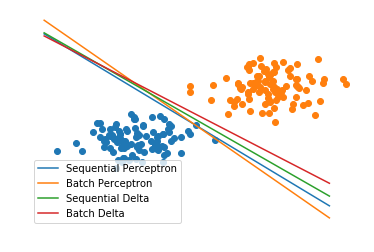

In [90]:
x = np.arange(-2.5,2.5,.5)

# Get decision boundaries using the learned weights
ySeqProp = -propSeqW[2]/propSeqW[1] - propSeqW[0]*x/propSeqW[1]
yBatchProp = -propBatchW[2]/propBatchW[1] - propBatchW[0]*x/propBatchW[1]
ySeqDelta = -deltaSeqW[2]/deltaSeqW[1] - deltaSeqW[0]*x/deltaSeqW[1]
yBatchDelta = -deltaBatchW[2]/deltaBatchW[1] - deltaBatchW[0]*x/deltaBatchW[1]

# Plot decision boundaries and classes
plt.plot(x, ySeqProp,label="Sequential Perceptron")
plt.plot(x, yBatchProp,label="Batch Perceptron")
plt.plot(x, ySeqDelta,label="Sequential Delta")
plt.plot(x, yBatchDelta,label="Batch Delta")
plt.legend(loc=3)
plt.scatter(class1[:,0], class1[:,1])
plt.scatter(class2[:,0], class2[:,1])
plt.axis("off")

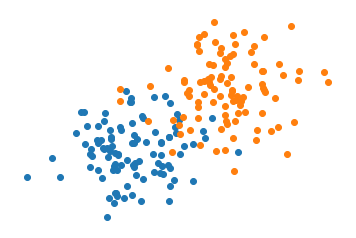

In [91]:
np.random.seed(3)
# Generate two classes 
class1 = np.random.multivariate_normal([-0.5, -0.5], [[.2, 0],[0, .2]], 100)
class2 = np.random.multivariate_normal([0.5, 0.5], [[.2, 0],[0, .2]], 100)

# Make a scatter plot of the classes
plt.scatter(class1[:,0],class1[:,1])
plt.scatter(class2[:,0],class2[:,1])
plt.xticks([])
plt.yticks([])
plt.axis("off")


# Create targets for each of the classes
class1Targets = np.ones((len(class1),1))*-1
class2Targets = np.ones((len(class2),1))

# Concatenate the classes to the data, create data
class1 = np.concatenate((class1, class1Targets), axis=1)
class2 = np.concatenate((class2, class2Targets), axis=1)
data = np.concatenate((class1, class2), axis=0)
np.random.shuffle(data)


[28.999999999999996, 8.5, 7.5, 7.5, 7.5, 8.0, 8.5, 8.5, 8.5, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.5, 9.5, 8.0, 9.5, 7.5, 8.0, 16.0, 31.5, 24.5, 7.5, 8.5, 9.0]
[28.999999999999996, 10.5, 7.5, 7.000000000000001, 7.000000000000001, 8.5, 8.5, 8.5, 8.5, 9.0, 9.0, 9.0, 9.5, 9.0, 9.0, 9.0, 9.0, 9.0, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.0]


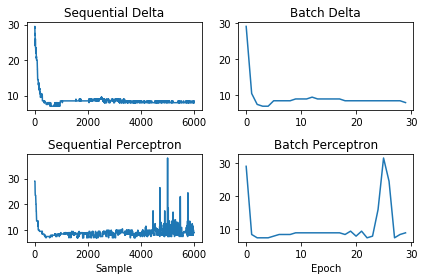

In [92]:
propSeqW, propSeqE = train(data,30,0.001)
propBatchW, propBatchE = trainBatch(data,30,0.001)

deltaSeqW, deltaSeqE = deltaSeq(data, 30, 0.001)
deltaBatchW, deltaBatchE = deltaBatch(data, 30, 0.001)

plt.subplot(2,2,1)
plt.plot(deltaSeqE)
plt.title("Sequential Delta")

plt.subplot(2,2,2)
plt.plot(deltaBatchE)
plt.title("Batch Delta")


plt.subplot(2,2,3)
plt.plot(propSeqE)
plt.xlabel("Sample")
plt.title("Sequential Perceptron")

plt.subplot(2,2,4)
plt.plot(propBatchE)
plt.xlabel("Epoch")
plt.title("Batch Perceptron")
plt.tight_layout()

print(propBatchE)
print(deltaBatchE)

(-2.725, 2.225, -2.994929945039737, 3.651051830071413)

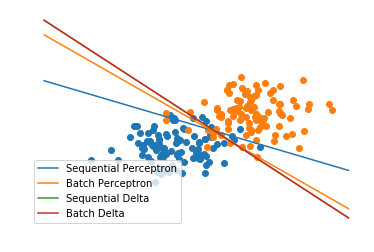

In [93]:
x = np.arange(-2.5,2.5,.5)

# Get decision boundaries using the learned weights
ySeqProp = -propSeqW[2]/propSeqW[1] - propSeqW[0]*x/propSeqW[1]
yBatchProp = -propBatchW[2]/propBatchW[1] - propBatchW[0]*x/propBatchW[1]
ySeqDelta = -deltaSeqW[2]/deltaSeqW[1] - deltaSeqW[0]*x/deltaSeqW[1]
yBatchDelta = -deltaBatchW[2]/deltaBatchW[1] - deltaBatchW[0]*x/deltaBatchW[1]

# Plot decision boundaries and classes
plt.plot(x, ySeqProp,label="Sequential Perceptron")
plt.plot(x, yBatchProp,label="Batch Perceptron")
plt.plot(x, ySeqDelta,label="Sequential Delta")
plt.plot(x, yBatchDelta,label="Batch Delta")
plt.legend(loc=3)
plt.scatter(class1[:,0], class1[:,1])
plt.scatter(class2[:,0], class2[:,1])
plt.axis("off")